In [254]:
import numpy as np
import pandas as pd
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from scipy import stats

In [255]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [256]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

### 연도별 평균기온 <hr>

In [257]:
file = './DATA/서울 연도별 평균기온.csv'

In [258]:
yearly_tempDF = pd.read_csv(file, header = 6, index_col = 0)
yearly_tempDF.head()

,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
년,,,,
1907,108.0,NaN,NaN,NaN
1908,108.0,10.4,5.8,15.7
1909,108.0,10.6,5.8,16.0
1910,108.0,10.3,5.7,15.9
1911,108.0,10.6,6.0,15.9


In [259]:
yearly_tempDF.tail()

,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
년,,,,
2020,108.0,13.2,9.4,17.9
2021,108.0,13.7,9.6,18.5
2022,108.0,13.2,9.2,18.0
2023,108.0,14.1,10.0,18.7
\t\t\t,NaN,NaN,NaN,NaN


In [260]:
yearly_tempDF = yearly_tempDF.loc['1991' : '2023']
yearly_tempDF

,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
년,,,,
1991,108.0,12.3,8.2,17.0
1992,108.0,12.5,8.5,16.9
1993,108.0,12.0,8.1,16.7
1994,108.0,13.5,9.5,18.3
1995,108.0,12.2,8.2,16.7
1996,108.0,12.2,8.3,16.8
1997,108.0,12.9,8.7,17.7
1998,108.0,13.8,9.8,18.4
1999,108.0,13.2,9.0,17.8


In [261]:
yearly_tempDF.shape

(33, 4)

In [262]:
yearly_tempDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1991 to 2023
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         33 non-null     float64
 1   평균기온(℃)    33 non-null     float64
 2   평균최저기온(℃)  33 non-null     float64
 3   평균최고기온(℃)  33 non-null     float64
dtypes: float64(4)
memory usage: 1.3+ KB


In [263]:
yearly_tempDF['평균최고기온(℃)'].isna().sum()

0

In [264]:
yearly_tempDF['평균최저기온(℃)'].isna().sum()

0

In [265]:
yearly_tempDF.columns

Index(['지점', '평균기온(℃)', '평균최저기온(℃)', '평균최고기온(℃)'], dtype='object')

In [266]:
yearly_tempDF.index

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object', name='년')

In [267]:
yearly_tempDF.index.name

'년'

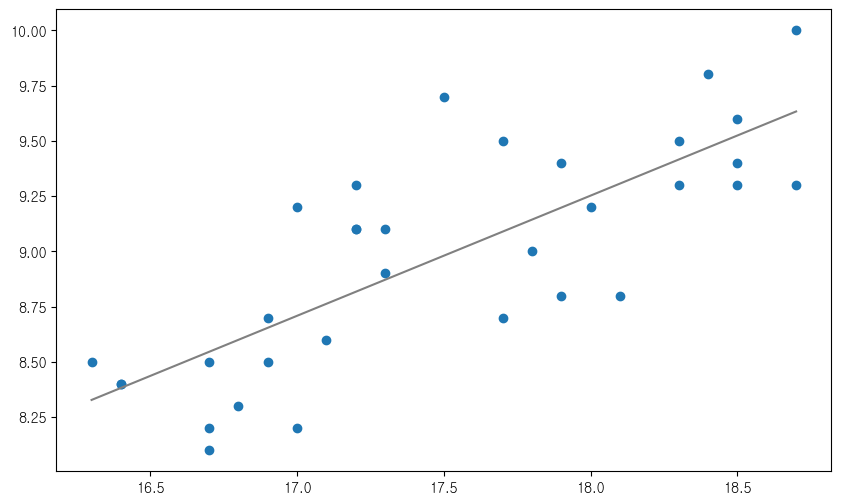

In [268]:
mean_maxtemp = yearly_tempDF['평균최고기온(℃)'].values
mean_mintemp = yearly_tempDF['평균최저기온(℃)'].values
plt.figure(figsize = (10, 6))
plt.scatter(yearly_tempDF['평균최고기온(℃)'], yearly_tempDF['평균최저기온(℃)'])

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(mean_maxtemp, mean_mintemp, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(mean_maxtemp.min(), mean_maxtemp.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.show()

In [269]:
mean_maxtemp = yearly_tempDF['평균최고기온(℃)'].values
mean_mintemp = yearly_tempDF['평균최저기온(℃)'].values
np.cov(mean_maxtemp, mean_mintemp)

array([[0.53342803, 0.29005682],
       [0.29005682, 0.25778409]])

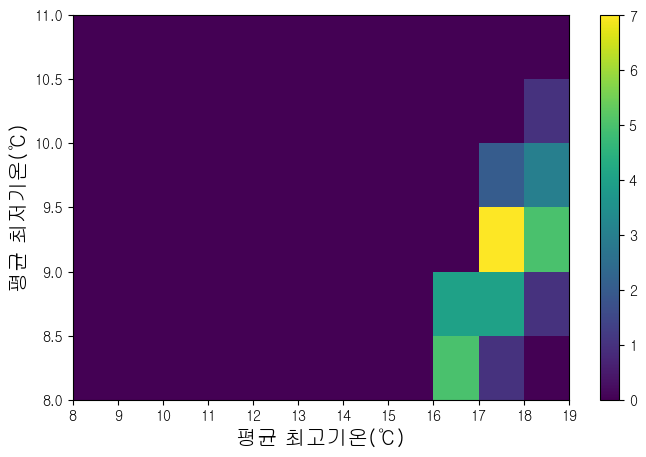

In [270]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

M_maxtemp = math.floor(mean_maxtemp.max()) + 1
N_maxtemp = math.floor(mean_mintemp.min())
M_mintemp = math.floor(mean_mintemp.max()) + 1
N_mintemp = math.floor(mean_mintemp.min())
d_maxtemp = (M_maxtemp - N_maxtemp)
d_mintemp = (M_mintemp - N_mintemp)*2

c = ax.hist2d(mean_maxtemp, mean_mintemp,
              bins=[d_maxtemp, d_mintemp], range=[(N_maxtemp, M_maxtemp), (N_mintemp, M_mintemp)])
ax.set_xlabel('평균 최고기온(℃)', size = 15)
ax.set_ylabel('평균 최저기온(℃)', size = 15)
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [271]:
np.corrcoef(mean_maxtemp, mean_mintemp)

array([[1.        , 0.78219873],
       [0.78219873, 1.        ]])

In [272]:
def min_max_temp(city, start_year = '1992', end_year = '2022'):
    meantemp_file = f'./DATA/{city} 연도별 평균기온.csv'
    yearly_tempDF = pd.read_csv(meantemp_file, header = 6, index_col = 0)
    yearly_tempDF = yearly_tempDF.loc[start_year : end_year]
    mean_maxtemp = yearly_tempDF['평균최고기온(℃)'].values
    mean_mintemp = yearly_tempDF['평균최저기온(℃)'].values
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
    axes[0].scatter(mean_maxtemp, mean_mintemp, color = 'cornflowerblue')
    axes[0].set_xlabel('평균 최고기온(℃)', size = 15)
    axes[0].set_ylabel('평균 최저기온(℃)', size = 15)

    # 계수β_0와β_1를 구한다
    poly_fit = np.polyfit(mean_maxtemp, mean_mintemp, 1)
    # β_0+β_1 x를 반환하는 함수를 작성
    poly_1d = np.poly1d(poly_fit)
    # 직선을 그리기 위해 x좌표를 생성
    xs = np.linspace(mean_maxtemp.min(), mean_maxtemp.max())
    # xs에 대응하는 y좌표를 구한다
    ys = poly_1d(xs)
    axes[0].plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

    M_maxtemp = math.floor(mean_maxtemp.max()) + 1
    N_maxtemp = math.floor(mean_mintemp.min())
    M_mintemp = math.floor(mean_mintemp.max()) + 1
    N_mintemp = math.floor(mean_mintemp.min())
    d_maxtemp = (M_maxtemp - N_maxtemp)
    d_mintemp = (M_mintemp - N_mintemp)*2

    c = axes[1].hist2d(mean_maxtemp, mean_mintemp,
                  bins=[d_maxtemp, d_mintemp], range=[(N_maxtemp, M_maxtemp), (N_mintemp, M_mintemp)])
    axes[1].set_xlabel('평균 최고기온(℃)', size = 15)
    axes[1].set_ylabel('평균 최저기온(℃)', size = 15)
    axes[1].set_xticks(c[1])
    axes[1].set_yticks(c[2])
    # 컬러 바의 표시
    fig.colorbar(c[3], ax=axes[1])

plt.show()

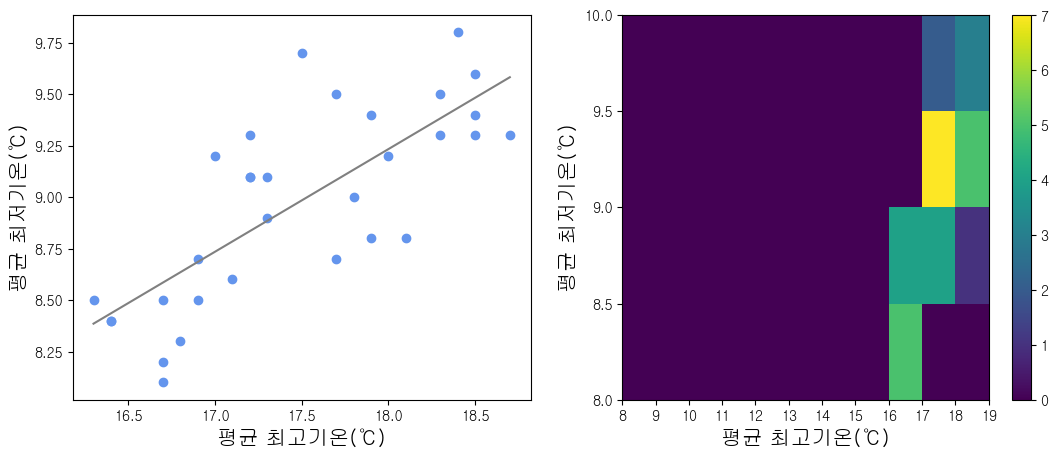

In [273]:
min_max_temp('서울')

### 연도별 강수량 <hr>

In [274]:
file2 = './DATA/서울 연도별 강수량.csv'

In [275]:
yearly_preciDF = pd.read_csv(file2, header = 6, index_col = 0)
yearly_preciDF.head()

,지점,강수량(mm)
년,,
1907,108,126.6
1908,108,1066.3
1909,108,827.0
1910,108,1020.9
1911,108,1067.0


In [276]:
yearly_preciDF.head() / 100

,지점,강수량(mm)
년,,
1907,1.08,1.266
1908,1.08,10.663
1909,1.08,8.270
1910,1.08,10.209
1911,1.08,10.670


In [277]:
yearly_preciDF.shape

(117, 2)

In [278]:
yearly_preciDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 1907 to 2023
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       117 non-null    int64  
 1   강수량(mm)  117 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


### 연도별 평균기온과 강수량과의 관계 <hr>

In [279]:
def meantemp_precipitation(city, start_year = '1992', end_year = '2022'):
    meantemp_file = f'./DATA/{city} 연도별 평균기온.csv'
    precipitation_file = f'./DATA/{city} 연도별 강수량.csv'
    yearly_tempDF = pd.read_csv(meantemp_file, header = 6, index_col = 0)
    yearly_preciDF = pd.read_csv(precipitation_file, header = 6, index_col = 0) 
    yearly_tempDF = yearly_tempDF.loc[start_year : end_year]
    yearly_preciDF = yearly_preciDF.loc[start_year : end_year]
    yearly_preciDF = yearly_preciDF.dropna()
    mean_temp = yearly_tempDF['평균기온(℃)'].values
    precipitation = yearly_preciDF['강수량(mm)'].values / 100
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
    fig.suptitle(f'<{start_year}년부터 {end_year}년까지의 {city}의 평균기온과 강수량 관계>', fontsize=20)
    axes[0].scatter(mean_temp, precipitation, color = 'cornflowerblue')
    axes[0].set_xlabel('평균기온(℃)', size = 15)
    axes[0].set_ylabel('강수량', size = 15)
    axes[0].set_title('단위:100mm', loc = 'left')

    # 계수β_0와β_1를 구한다
    poly_fit = np.polyfit(mean_temp, precipitation, 1)
    # β_0+β_1 x를 반환하는 함수를 작성
    poly_1d = np.poly1d(poly_fit)
    # 직선을 그리기 위해 x좌표를 생성
    xs = np.linspace(mean_temp.min(), mean_temp.max())
    # xs에 대응하는 y좌표를 구한다
    ys = poly_1d(xs)
    axes[0].plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

    M_meantemp = math.floor(mean_temp.max()) + 1
    N_meantemp = math.floor(mean_temp.min())
    M_precipitation = math.floor(precipitation.max()) + 1
    N_precipitation = math.floor(precipitation.min())
    d_meantemp = (M_meantemp - N_meantemp)*4
    d_precipitation = (M_precipitation - N_precipitation)*1

    c = axes[1].hist2d(mean_temp, precipitation,
                  bins=[d_meantemp, d_precipitation], range=[(N_meantemp, M_meantemp), (N_precipitation, M_precipitation)])
    axes[1].set_xlabel('평균기온(℃)', size = 15)
    axes[1].set_ylabel('강수량', size = 15)
    axes[1].set_xticks(c[1])
    axes[1].set_yticks(c[2])
    axes[1].set_title('단위:100mm', loc = 'left')
    axes[1].tick_params(labelrotation = 20)
    # 컬러 바의 표시
    fig.colorbar(c[3], ax=axes[1])
    print(f'상관계수 : {round(np.corrcoef(mean_temp, precipitation)[0, 1], 3)}')

plt.show()

상관계수 : -0.297


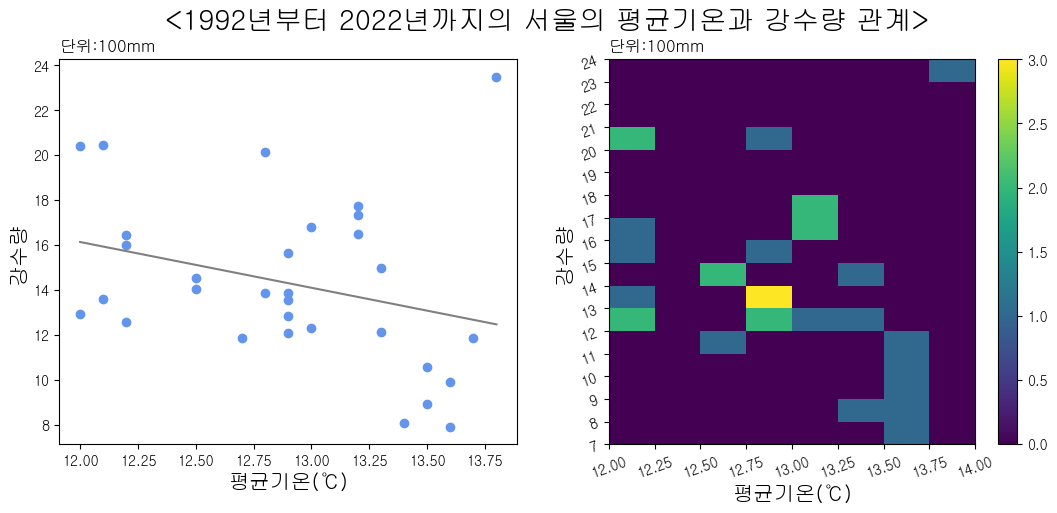

In [280]:
meantemp_precipitation('서울', start_year = '1992', end_year = '2022')


### 평균기온 데이터프레임과 강수량 데이터프레임을 병합 후 시각화 <hr>

- 광역특별시의 연도별 기온

In [281]:
file1 = './DATA/서울 연도별 평균기온.csv'
file2 = './DATA/서울 연도별 강수량.csv'

df1 = pd.read_csv(file1, header = 6, index_col = 0)
df2 = pd.read_csv(file2, header = 6, index_col = 0)
df1 = df1.drop('지점', axis = 1)
df2 = df2.drop('지점', axis = 1)
df1 = df1.loc['1992':'2022']
df2 = df2.loc['1992':'2022']
#df = pd.concat([df1, df2], axis = 1)
#df

In [282]:
df1 = df1.reset_index(drop = True)

In [283]:
df2 = df2.reset_index(drop = True)

In [284]:
df = pd.concat([df1, df2], axis = 1, keys = ['서울', '서울'])

In [285]:
df

서울                            
   평균기온(℃) 평균최저기온(℃) 평균최고기온(℃) 강수량(mm)
0     12.5       8.5      16.9  1454.9
1     12.0       8.1      16.7  1292.7
2     13.5       9.5      18.3  1055.8
3     12.2       8.2      16.7  1598.6
4     12.2       8.3      16.8  1256.6
5     12.9       8.7      17.7  1210.2
6     13.8       9.8      18.4  2349.1
7     13.2       9.0      17.8  1733.1
8     12.7       8.6      17.1  1186.8
9     12.8       8.9      17.3  1386.0
10    12.9       9.1      17.2  1388.0
11    12.8       9.2      17.0  2012.0
12    13.3       9.5      17.7  1499.1
13    12.1       8.4      16.4  1358.4
14    13.0       9.3      17.2  1681.9
15    13.3       9.7      17.5  1212.3
16    12.9       9.1      17.3  1356.3
17    12.9       9.1      17.2  1564.0
18    12.1       8.5      16.3  2043.5
19    12.0       8.4      16.4  2039.3
20    12.2       8.5      16.7  1646.3
21    12.5       8.7      16.9  1403.8
22    13.4       9.3      18.3   808.9
23    13.6       9.3      18.7   792.1
24    13.6       9.4      18.5   991.7
25    13.0       8.8      18.1  1233.2
26    12.9       8.8      17.9  1284.1
27    13.5       9.3      18.5   891.3
28    13.2       9.4      17.9  1651.1
29    13.7       9.6      18.5  1186.5
30    13.2       9.2      18.0  1775.3

In [286]:
def data_merge(start_year = '1992', end_year = '2022', city_list = ['서울', '부산', '인천', '대구', '대전', '광주', '울산']):
    pretempDF = pd.DataFrame()
    for city in city_list:
        file1 = f'./DATA/{city} 연도별 평균기온.csv'
        file2 = f'./DATA/{city} 연도별 강수량.csv'
        df1 = pd.read_csv(file1, header = 6, index_col = 0)
        df2 = pd.read_csv(file2, header = 6, index_col = 0)
        df1 = df1.drop('지점', axis = 1)
        df2 = df2.drop('지점', axis = 1)
        df1 = df1.loc[start_year : end_year]
        df2 = df2.loc[start_year : end_year]
        df1 = df1.reset_index(drop = True)  # drop = True => 기존 index 삭제 후 0,1,2,...로 인덱스 대체
        df2 = df2.reset_index(drop = True)
        df = pd.concat([df1, df2], axis = 1, keys = [city, city])
        pretempDF = pd.concat([pretempDF, df], axis = 1)

    pretempDF.index = [str(year) for year in range(int(start_year), int(end_year)+1)]
    pretempDF = pretempDF.dropna()
    return pretempDF

In [287]:
data_merge()

서울                                  부산                              \
     평균기온(℃) 평균최저기온(℃) 평균최고기온(℃) 강수량(mm) 평균기온(℃) 평균최저기온(℃) 평균최고기온(℃) 강수량(mm)   
1992    12.5       8.5      16.9  1454.9    14.8      11.5      18.8  1308.9   
1993    12.0       8.1      16.7  1292.7    14.0      10.7      18.2  1615.3   
1994    13.5       9.5      18.3  1055.8    15.6      12.2      20.0   959.9   
1995    12.2       8.2      16.7  1598.6    14.5      11.0      19.1  1005.7   
1996    12.2       8.3      16.8  1256.6    14.5      10.9      19.1  1289.6   
1997    12.9       8.7      17.7  1210.2    15.2      11.7      19.8  1598.1   
1998    13.8       9.8      18.4  2349.1    15.8      12.8      19.7  2028.8   
1999    13.2       9.0      17.8  1733.1    15.0      11.8      19.2  2396.7   
2000    12.7       8.6      17.1  1186.8    14.9      11.6      19.2  1248.5   
2001    12.8       8.9      17.3  1386.0    15.3      12.0      20.0  1171.3   
2002    12.9       9.1      17.2  1388.0    14.7      11.4      18.9  2085.2   
2003    12.8       9.2      17.0  2012.0    14.3      11.2      18.5  2328.3   
2004    13.3       9.5      17.7  1499.1    14.9      11.5      19.3  1386.5   
2005    12.1       8.4      16.4  1358.4    13.8      10.5      18.1  1383.9   
2006    13.0       9.3      17.2  1681.9    14.7      11.4      18.9  1528.3   
2007    13.3       9.7      17.5  1212.3    15.3      12.4      19.1  1276.5   
2008    12.9       9.1      17.3  1356.3    15.0      12.0      18.8  1168.3   
2009    12.9       9.1      17.2  1564.0    15.2      12.1      19.2  1772.9   
2010    12.1       8.5      16.3  2043.5    14.9      11.7      19.0  1441.9   
2011    12.0       8.4      16.4  2039.3    14.6      11.3      18.8  1478.6   
2012    12.2       8.5      16.7  1646.3    14.5      11.3      18.6  1983.3   
2013    12.5       8.7      16.9  1403.8    15.3      11.8      19.5  1130.1   
2014    13.4       9.3      18.3   808.9    15.1      12.0      19.2  1693.1   
2015    13.6       9.3      18.7   792.1    15.4      12.2      19.5  1396.7   
2016    13.6       9.4      18.5   991.7    15.7      12.5      19.8  1760.2   
2017    13.0       8.8      18.1  1233.2    15.2      11.7      19.6  1014.4   
2018    12.9       8.8      17.9  1284.1    15.1      11.8      19.2  1778.6   
2019    13.5       9.3      18.5   891.3    15.7      12.5      19.8  1623.2   
2020    13.2       9.4      17.9  1651.1    15.2      11.9      19.4  2281.6   
2021    13.7       9.6      18.5  1186.5    15.7      12.4      19.9  1807.8   
2022    13.2       9.2      18.0  1775.3    15.4      12.0      19.8   991.9   

          인천            ...        대전              광주                      \
     평균기온(℃) 평균최저기온(℃)  ... 평균최고기온(℃) 강수량(mm) 평균기온(℃) 평균최저기온(℃) 평균최고기온(℃)   
1992    11.9       8.4  ...      18.5  1036.9    13.7       9.1      19.1   
1993    11.5       8.1  ...      17.8  1533.1    13.1       8.8      18.4   
1994    12.9       9.3  ...      19.7   857.9    14.6       9.9      20.3   
1995    11.7       8.3  ...      18.4  1136.2    13.4       8.9      18.7   
1996    11.6       8.0  ...      18.0  1279.2    13.2       8.9      18.6   
1997    12.1       8.3  ...      18.7  1765.9    14.1       9.5      19.6   
1998    13.1       9.5  ...      19.2  2070.0    15.0      10.7      20.1   
1999    12.6       8.9  ...      18.5  1455.2    14.3       9.9      19.4   
2000    12.7       9.2  ...      18.1  1707.5    13.5       9.0      19.0   
2001    12.8       9.3  ...      18.8   828.7    13.8       9.4      19.4   
2002    13.1       9.4  ...      18.4  1378.7    13.9       9.4      19.3   
2003    12.5       9.1  ...      18.0  1748.9    13.6       9.5      18.4   
2004    12.9       9.2  ...      19.3  1496.5    14.3       9.8      19.8   
2005    12.0       8.3  ...      17.5  1656.1    13.6       9.4      18.7   
2006    12.7       9.4  ...      18.3  1195.2    14.2      10.0      19.2   
2007    12.9       9.9  ...      18.4  1750.9    14.6      1

In [288]:
pretempDF = data_merge()

In [289]:
# pretempDF.to_csv('특별광역시의 기온·강수량 데이터.csv')

In [290]:
pretempDF.index

Index(['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

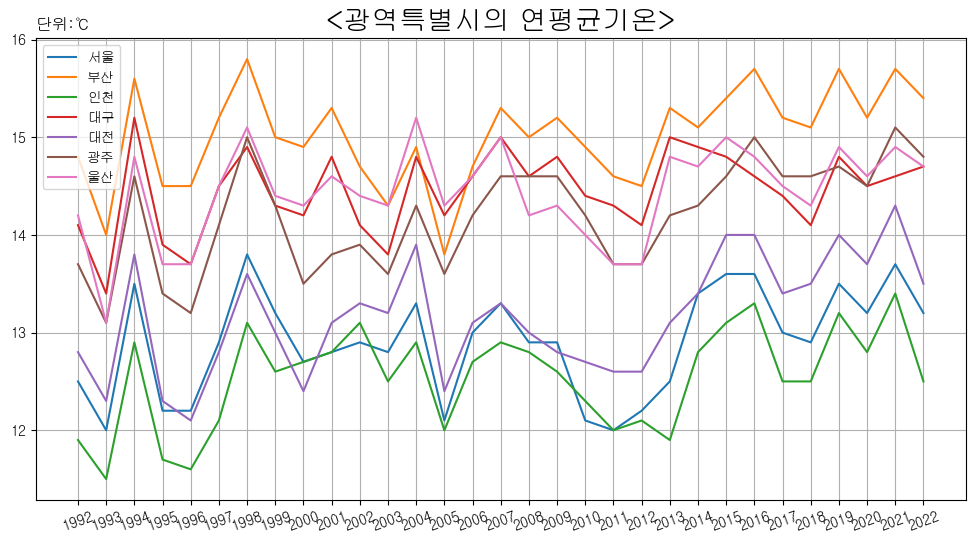

In [291]:
mean_tempDF = pretempDF.xs('평균기온(℃)', level = 1, axis = 1)

mean_tempDF.plot(figsize= (12, 6))
plt.xticks(range(len(mean_tempDF.index)),mean_tempDF.index, rotation = 20)
plt.title('<광역특별시의 연평균기온>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.grid(True)
plt.show()

In [292]:
pretempDF.xs('평균기온(℃)', level = 1, axis = 1)

,서울,부산,인천,대구,대전,광주,울산
1992,12.5,14.8,11.9,14.1,12.8,13.7,14.2
1993,12.0,14.0,11.5,13.4,12.3,13.1,13.1
1994,13.5,15.6,12.9,15.2,13.8,14.6,14.8
1995,12.2,14.5,11.7,13.9,12.3,13.4,13.7
1996,12.2,14.5,11.6,13.7,12.1,13.2,13.7
1997,12.9,15.2,12.1,14.5,12.8,14.1,14.5
1998,13.8,15.8,13.1,14.9,13.6,15.0,15.1
1999,13.2,15.0,12.6,14.3,13.0,14.3,14.4
2000,12.7,14.9,12.7,14.2,12.4,13.5,14.3
2001,12.8,15.3,12.8,14.8,13.1,13.8,14.6


- 광역특별시의 연평균기온의 평균과 강수량 평균 사이의 관계

In [293]:
filename = './DATA/특별광역시의 기온·강수량 데이터.csv'
temp_preciDF = pd.read_csv(filename, index_col = 0, header = [0, 1])

In [294]:
temp_preciDF.shape

(31, 28)

In [295]:
tempDF = temp_preciDF.xs('평균기온(℃)', level = 1, axis = 1)
preciDF = temp_preciDF.xs('강수량(mm)', level = 1, axis = 1)

상관계수 : -0.111


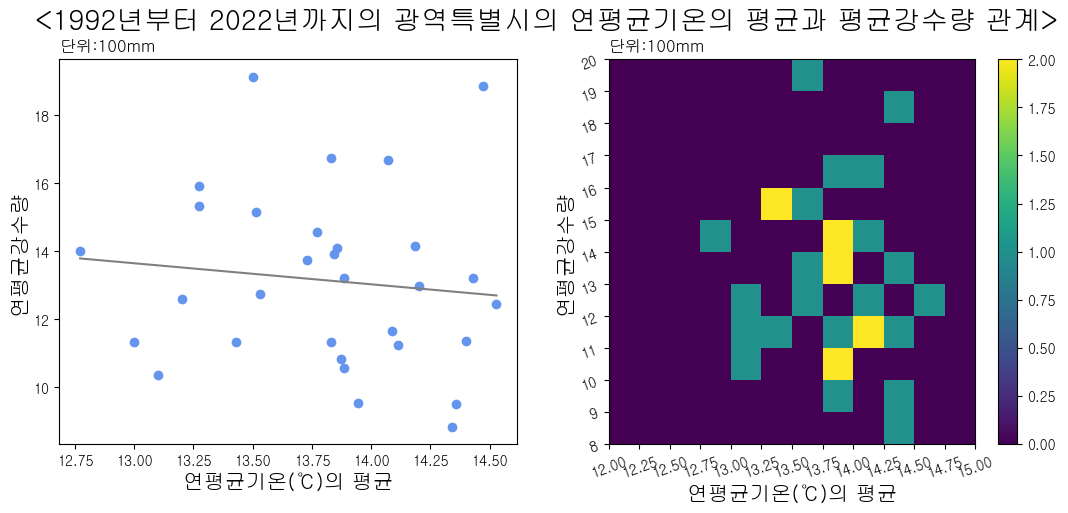

In [296]:
temp_value = tempDF.mean(axis = 1).values
preci_value = preciDF.mean(axis = 1).values / 100
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.suptitle(f'<{1992}년부터 {2022}년까지의 광역특별시의 연평균기온의 평균과 평균강수량 관계>', fontsize=20)
axes[0].scatter(temp_value, preci_value, color = 'cornflowerblue')
axes[0].set_xlabel('연평균기온(℃)의 평균', size = 15)
axes[0].set_ylabel('연평균강수량', size = 15)
axes[0].set_title('단위:100mm', loc = 'left')

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(temp_value, preci_value, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(temp_value.min(), temp_value.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
axes[0].plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

M_meantemp = math.floor(temp_value.max()) + 1
N_meantemp = math.floor(temp_value.min())
M_precipitation = math.floor(preci_value.max()) + 1
N_precipitation = math.floor(preci_value.min())
d_meantemp = (M_meantemp - N_meantemp)*4
d_precipitation = (M_precipitation - N_precipitation)*1

c = axes[1].hist2d(temp_value, preci_value,
                bins=[d_meantemp, d_precipitation], range=[(N_meantemp, M_meantemp), (N_precipitation, M_precipitation)])
axes[1].set_xlabel('연평균기온(℃)의 평균', size = 15)
axes[1].set_ylabel('연평균강수량', size = 15)
axes[1].set_xticks(c[1])
axes[1].set_yticks(c[2])
axes[1].tick_params(labelrotation = 20)
axes[1].set_title('단위:100mm', loc = 'left')
# 컬러 바의 표시
fig.colorbar(c[3], ax=axes[1])
print(f'상관계수 : {round(np.corrcoef(temp_value, preci_value)[0, 1], 3)}')
plt.show()

In [297]:
def meantemp_precipitation(city, start_year = '1992', end_year = '2022'):
    meantemp_file = f'./DATA/{city} 연도별 평균기온.csv'
    precipitation_file = f'./DATA/{city} 연도별 강수량.csv'
    yearly_tempDF = pd.read_csv(meantemp_file, header = 6, index_col = 0)
    yearly_preciDF = pd.read_csv(precipitation_file, header = 6, index_col = 0) 
    yearly_tempDF = yearly_tempDF.loc[start_year : end_year]
    yearly_preciDF = yearly_preciDF.loc[start_year : end_year]
    yearly_preciDF = yearly_preciDF.dropna()
    mean_temp = yearly_tempDF['평균기온(℃)'].values
    precipitation = yearly_preciDF['강수량(mm)'].values / 100
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
    fig.suptitle(f'<{start_year}년부터 {end_year}년까지의 {city}의 기온과 강수량 관계>', fontsize=20)
    axes[0].scatter(mean_temp, precipitation, color = 'cornflowerblue')
    axes[0].set_xlabel('평균기온(℃)', size = 15)
    axes[0].set_ylabel('강수량(단위:100mm)', size = 15)

    # 계수β_0와β_1를 구한다
    poly_fit = np.polyfit(mean_temp, precipitation, 1)
    # β_0+β_1 x를 반환하는 함수를 작성
    poly_1d = np.poly1d(poly_fit)
    # 직선을 그리기 위해 x좌표를 생성
    xs = np.linspace(mean_temp.min(), mean_temp.max())
    # xs에 대응하는 y좌표를 구한다
    ys = poly_1d(xs)
    axes[0].plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

    M_meantemp = math.floor(mean_temp.max()) + 1
    N_meantemp = math.floor(mean_temp.min())
    M_precipitation = math.floor(precipitation.max()) + 1
    N_precipitation = math.floor(precipitation.min())
    d_meantemp = (M_meantemp - N_meantemp)*4
    d_precipitation = (M_precipitation - N_precipitation)*1

    c = axes[1].hist2d(mean_temp, precipitation,
                  bins=[d_meantemp, d_precipitation], range=[(N_meantemp, M_meantemp), (N_precipitation, M_precipitation)])
    axes[1].set_xlabel('평균기온(℃)', size = 15)
    axes[1].set_ylabel('강수량(단위:100mm)', size = 15)
    axes[1].set_xticks(c[1])
    axes[1].set_yticks(c[2])
    # 컬러 바의 표시
    fig.colorbar(c[3], ax=axes[1])

plt.show()

In [298]:
type(pretempDF.xs('평균기온(℃)', level = 1, axis = 1).max(axis = 1))

pandas.core.series.Series

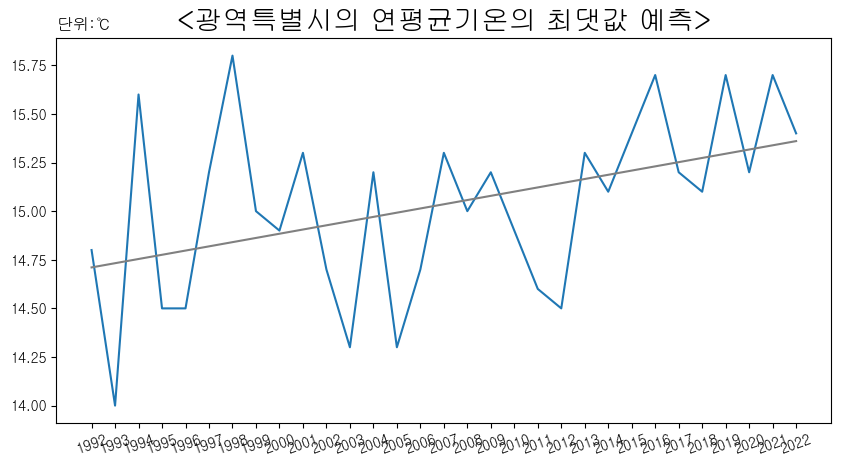

In [299]:
mean_tempSE = pretempDF.xs('평균기온(℃)', level = 1, axis = 1).max(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균기온의 최댓값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

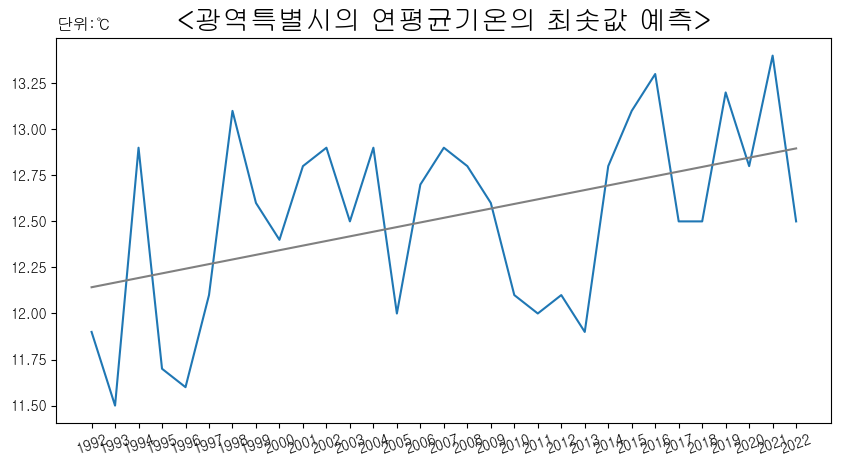

In [300]:
mean_tempSE = pretempDF.xs('평균기온(℃)', level = 1, axis = 1).min(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균기온의 최솟값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

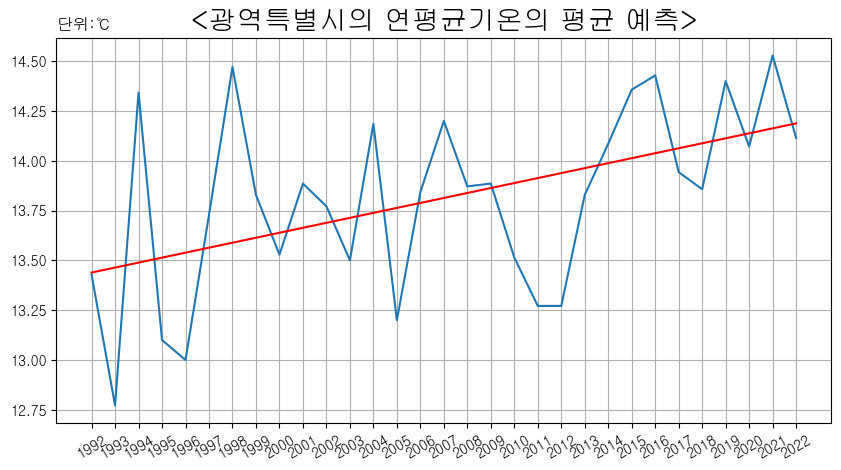

In [301]:
mean_tempSE = pretempDF.xs('평균기온(℃)', level = 1, axis = 1).mean(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 30)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균기온의 평균 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.grid(True)
plt.show()

In [302]:
pretempDF.xs('평균기온(℃)', level = 1, axis = 1).var(axis = 1)

1992    1.099048
1993    0.759048
1994    0.946190
1995    1.076667
1996    1.113333
1997    1.282381
1998    0.952381
1999    0.789048
2000    0.929048
2001    1.054762
2002    0.469048
2003    0.493333
2004    0.741429
2005    1.003333
2006    0.762857
2007    0.993333
2008    0.882381
2009    1.174762
2010    1.258095
2011    1.145714
2012    0.922381
2013    1.772381
2014    0.784762
2015    0.672857
2016    0.709048
2017    0.966190
2018    0.872857
2019    0.766667
2020    0.739048
2021    0.642381
2022    1.104762
dtype: float64

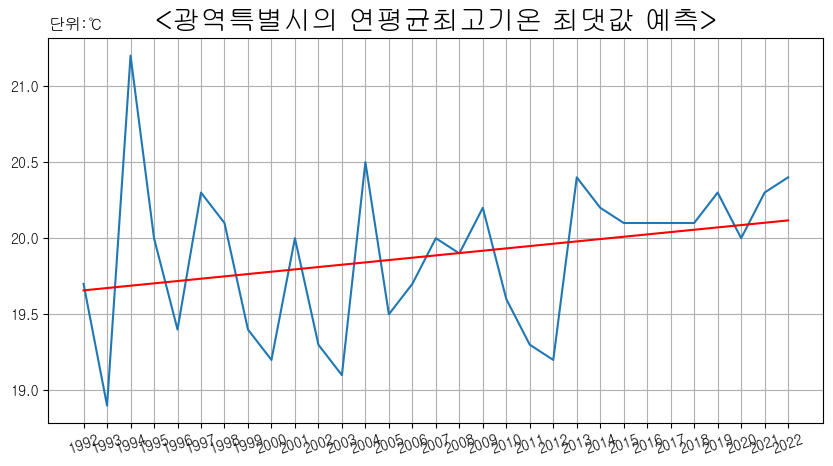

In [303]:
mean_tempSE = pretempDF.xs('평균최고기온(℃)', level = 1, axis = 1).max(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균최고기온 최댓값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.grid(True)
plt.show()

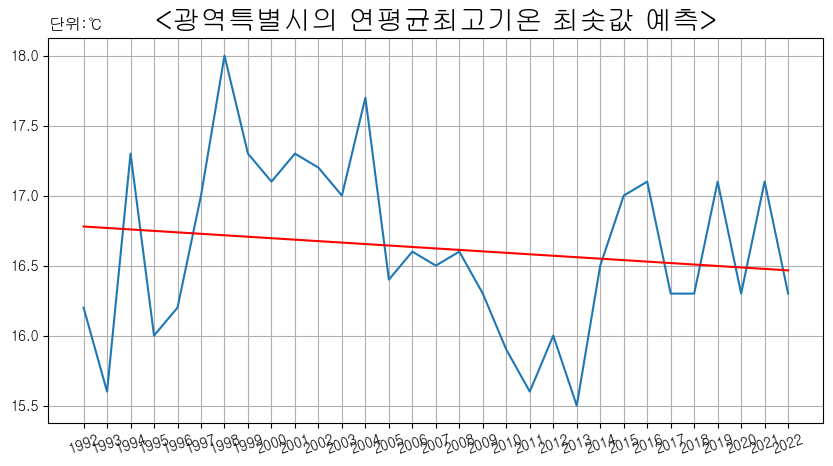

In [304]:
mean_tempSE = pretempDF.xs('평균최고기온(℃)', level = 1, axis = 1).min(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균최고기온 최솟값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.grid(True)
plt.show()

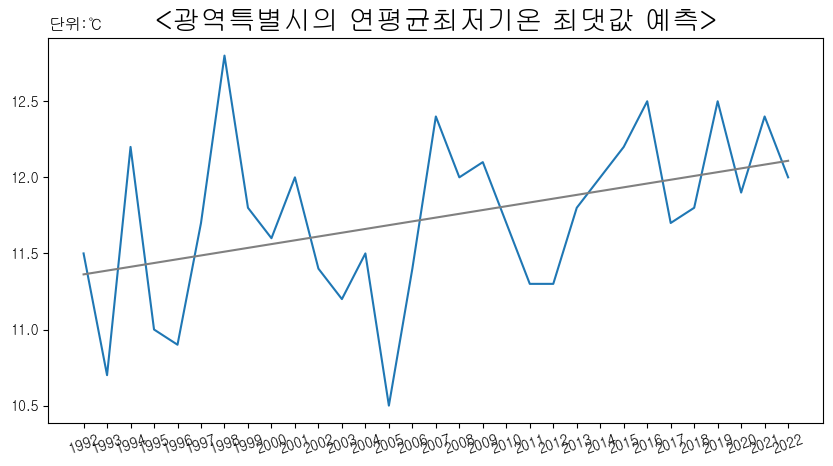

In [305]:
mean_tempSE = pretempDF.xs('평균최저기온(℃)', level = 1, axis = 1).max(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균최저기온 최댓값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

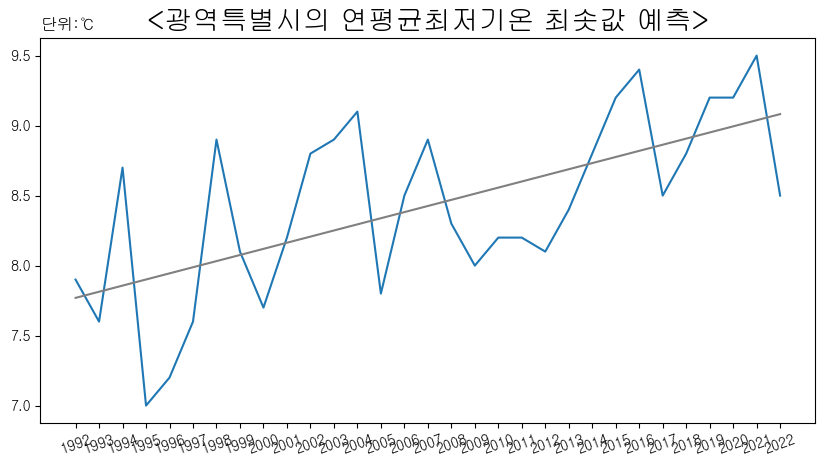

In [306]:
mean_tempSE = pretempDF.xs('평균최저기온(℃)', level = 1, axis = 1).min(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(mean_tempSE.values)
plt.xticks(range(len(mean_tempSE.index)), mean_tempSE.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(mean_tempSE.index)), mean_tempSE.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(mean_tempSE.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.title('<광역특별시의 연평균최저기온 최솟값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

- 중부지방, 남부지방의 연평균기온, 연평균최고기온, 연평균최저기온 추이

In [307]:
pretempDF = data_merge()

In [308]:
pretempDF.columns

MultiIndex([('서울',   '평균기온(℃)'),
            ('서울', '평균최저기온(℃)'),
            ('서울', '평균최고기온(℃)'),
            ('서울',   '강수량(mm)'),
            ('부산',   '평균기온(℃)'),
            ('부산', '평균최저기온(℃)'),
            ('부산', '평균최고기온(℃)'),
            ('부산',   '강수량(mm)'),
            ('인천',   '평균기온(℃)'),
            ('인천', '평균최저기온(℃)'),
            ('인천', '평균최고기온(℃)'),
            ('인천',   '강수량(mm)'),
            ('대구',   '평균기온(℃)'),
            ('대구', '평균최저기온(℃)'),
            ('대구', '평균최고기온(℃)'),
            ('대구',   '강수량(mm)'),
            ('대전',   '평균기온(℃)'),
            ('대전', '평균최저기온(℃)'),
            ('대전', '평균최고기온(℃)'),
            ('대전',   '강수량(mm)'),
            ('광주',   '평균기온(℃)'),
            ('광주', '평균최저기온(℃)'),
            ('광주', '평균최고기온(℃)'),
            ('광주',   '강수량(mm)'),
            ('울산',   '평균기온(℃)'),
            ('울산', '평균최저기온(℃)'),
            ('울산', '평균최고기온(℃)'),
            ('울산',   '강수량(mm)')],
           )

In [309]:
a = pretempDF.xs(('서울', '평균기온(℃)'), level = [0, 1], axis = 1)
a

,서울
,평균기온(℃)
1992,12.5
1993,12.0
1994,13.5
1995,12.2
1996,12.2
1997,12.9
1998,13.8
1999,13.2
2000,12.7


In [310]:
b = pretempDF.xs(('인천', '평균기온(℃)'), level = [0, 1], axis = 1)
b

,인천
,평균기온(℃)
1992,11.9
1993,11.5
1994,12.9
1995,11.7
1996,11.6
1997,12.1
1998,13.1
1999,12.6
2000,12.7


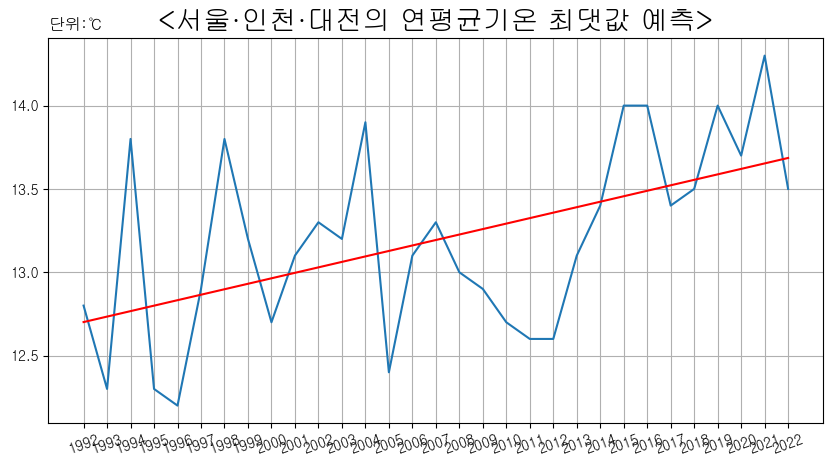

In [311]:
central_mean_tempDF = pretempDF[[('서울', '평균기온(℃)'), ('인천', '평균기온(℃)'), ('대전', '평균기온(℃)')]].max(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(central_mean_tempDF.values)
plt.xticks(range(len(central_mean_tempDF.index)), central_mean_tempDF.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(central_mean_tempDF.index)), central_mean_tempDF.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(central_mean_tempDF.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.grid(True)
plt.title('<서울·인천·대전의 연평균기온 최댓값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

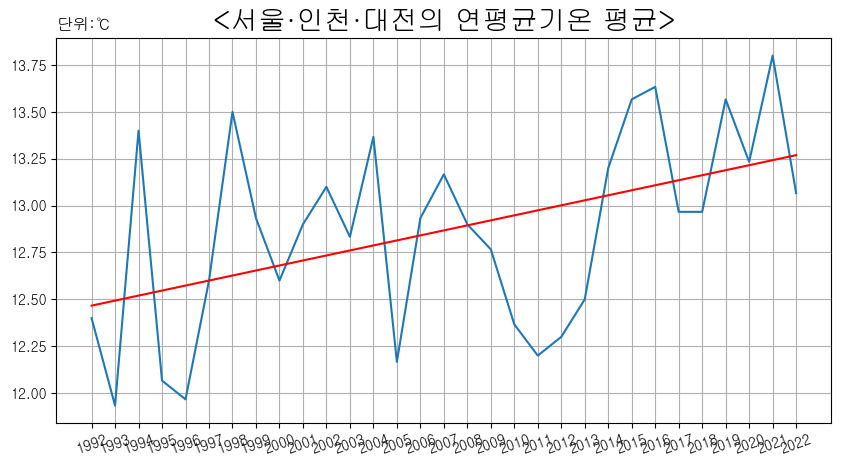

In [312]:
central_mean_tempDF = pretempDF[[('서울', '평균기온(℃)'), ('인천', '평균기온(℃)'), ('대전', '평균기온(℃)')]].mean(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(central_mean_tempDF.values)
plt.xticks(range(len(central_mean_tempDF.index)), central_mean_tempDF.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(central_mean_tempDF.index)), central_mean_tempDF.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(central_mean_tempDF.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.grid(True)
plt.title('<서울·인천·대전의 연평균기온 평균>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

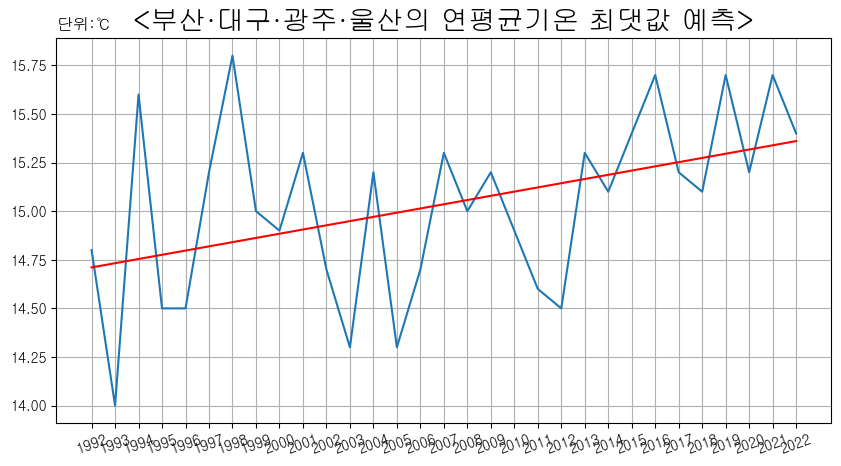

In [313]:
southern_mean_tempDF = pretempDF[[('부산', '평균기온(℃)'), ('대구', '평균기온(℃)'), ('광주', '평균기온(℃)'), ('울산', '평균기온(℃)')]].max(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(southern_mean_tempDF.values)
plt.xticks(range(len(southern_mean_tempDF.index)), southern_mean_tempDF.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(southern_mean_tempDF.index)), southern_mean_tempDF.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(southern_mean_tempDF.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.grid(True)
plt.title('<부산·대구·광주·울산의 연평균기온 최댓값 예측>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

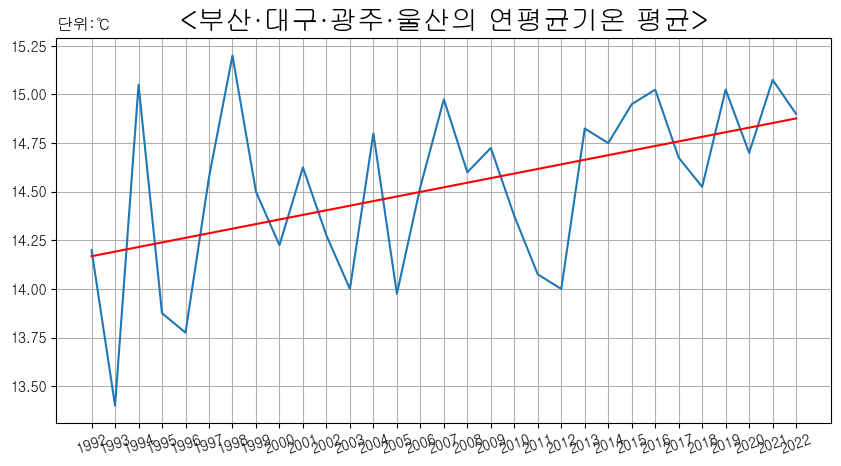

In [314]:
southern_mean_tempDF = pretempDF[[('부산', '평균기온(℃)'), ('대구', '평균기온(℃)'), ('광주', '평균기온(℃)'), ('울산', '평균기온(℃)')]].mean(axis = 1)
plt.figure(figsize = (10, 5))
plt.plot(southern_mean_tempDF.values)
plt.xticks(range(len(southern_mean_tempDF.index)), southern_mean_tempDF.index.values, rotation = 20)

# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(range(len(southern_mean_tempDF.index)), southern_mean_tempDF.values, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(0, len(southern_mean_tempDF.index)-1)
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
plt.plot(xs, ys, color = 'red', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.grid(True)
plt.title('<부산·대구·광주·울산의 연평균기온 평균>', size = 20)
plt.title('단위:℃', loc = 'left')
plt.show()

- 광역특별시 연도별 강수량

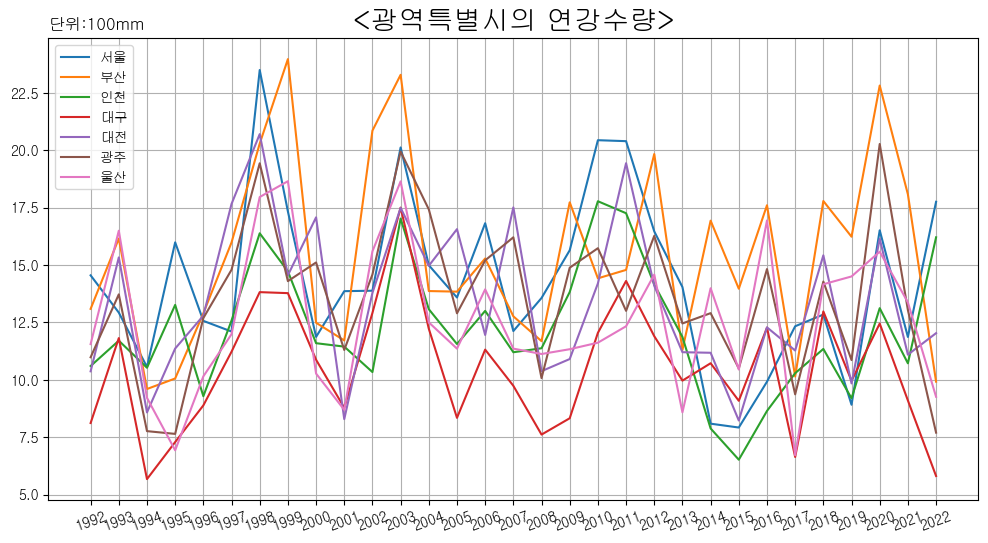

In [315]:
precipitationDF = pretempDF.xs('강수량(mm)', level = 1, axis = 1) / 100

precipitationDF.plot(figsize= (12, 6))
plt.xticks(range(len(precipitationDF.index)), precipitationDF.index, rotation = 20)
plt.title('<광역특별시의 연강수량>', size = 20)
plt.title('단위:100mm', loc = 'left')
plt.grid(True)
plt.show()

### 기온, 강수량 특정 기간 동안의 히스토그램 산출 <hr>

- 평균기온 히스토그램

In [316]:
def data_merge(start_year = '1992', end_year = '2022', city_list = ['서울', '부산', '인천', '대구', '대전', '광주', '울산']):
    pretempDF = pd.DataFrame()
    for city in city_list:
        file1 = f'./DATA/{city} 연도별 평균기온.csv'
        file2 = f'./DATA/{city} 연도별 강수량.csv'
        df1 = pd.read_csv(file1, header = 6, index_col = 0)
        df2 = pd.read_csv(file2, header = 6, index_col = 0)
        df1 = df1.drop('지점', axis = 1)
        df2 = df2.drop('지점', axis = 1)
        df1 = df1.loc[start_year : end_year]
        df2 = df2.loc[start_year : end_year]
        df1 = df1.reset_index(drop = True)  # drop = True => 기존 index 삭제 후 0,1,2,...로 인덱스 대체
        df2 = df2.reset_index(drop = True)
        df = pd.concat([df1, df2], axis = 1, keys = [city, city])
        pretempDF = pd.concat([pretempDF, df], axis = 1)

    pretempDF.index = [str(year) for year in range(int(start_year), int(end_year)+1)]
    pretempDF = pretempDF.dropna()
    return pretempDF

In [317]:
# 강수량 데이터의 경우 대전이 1969년부터 있으므로 
pretempDF = data_merge('1969', '2023')

In [318]:
mean_tempSE = pretempDF.xs('평균기온(℃)', level = 1, axis = 1).mean(axis = 1)
mean_tempSE

1969    11.971429
1970    12.242857
1971    12.485714
1972    12.728571
1973    13.042857
1974    12.028571
1975    13.142857
1976    12.242857
1977    12.971429
1978    13.457143
1979    13.314286
1980    11.871429
1981    12.228571
1982    13.214286
1983    13.100000
1984    12.600000
1985    12.814286
1986    12.328571
1987    13.014286
1988    12.942857
1989    13.700000
1990    14.000000
1991    13.171429
1992    13.428571
1993    12.771429
1994    14.342857
1995    13.100000
1996    13.000000
1997    13.728571
1998    14.471429
1999    13.828571
2000    13.528571
2001    13.885714
2002    13.771429
2003    13.500000
2004    14.185714
2005    13.200000
2006    13.842857
2007    14.200000
2008    13.871429
2009    13.885714
2010    13.514286
2011    13.271429
2012    13.271429
2013    13.828571
2014    14.085714
2015    14.357143
2016    14.428571
2017    13.942857
2018    13.857143
2019    14.400000
2020    14.071429
2021    14.528571
2022    14.114286
2023    14.700000
dtype: flo

In [319]:
diff = np.ceil(mean_tempSE.max()*10)/10 - np.trunc(mean_tempSE.min()*10)/10
diff

2.8999999999999986

In [320]:
int(round(diff, 1)*10)

29

In [321]:
np.linspace(np.trunc(mean_tempSE.min()*10)/10, np.ceil(mean_tempSE.max()*10)/10, int(round(diff, 1)*10) + 1)

array([11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8,
       12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9,
       14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7])

In [322]:
list(np.linspace(np.trunc(mean_tempSE.min()*10)/10, np.ceil(mean_tempSE.max()*10)/10, int(round(diff, 1)*10) + 1))

[11.8,
 11.9,
 12.0,
 12.100000000000001,
 12.200000000000001,
 12.3,
 12.4,
 12.5,
 12.6,
 12.700000000000001,
 12.8,
 12.9,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 13.899999999999999,
 14.0,
 14.1,
 14.2,
 14.299999999999999,
 14.399999999999999,
 14.5,
 14.6,
 14.7]

In [323]:
buckets = np.linspace(np.trunc(mean_tempSE.min()*10)/10, np.ceil(mean_tempSE.max()*10)/10, int(round(diff, 1)*10) + 1)
buckets
#series = mean_tempSE.value_counts(bins = buckets, sort = False)
#series

array([11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8,
       12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9,
       14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7])

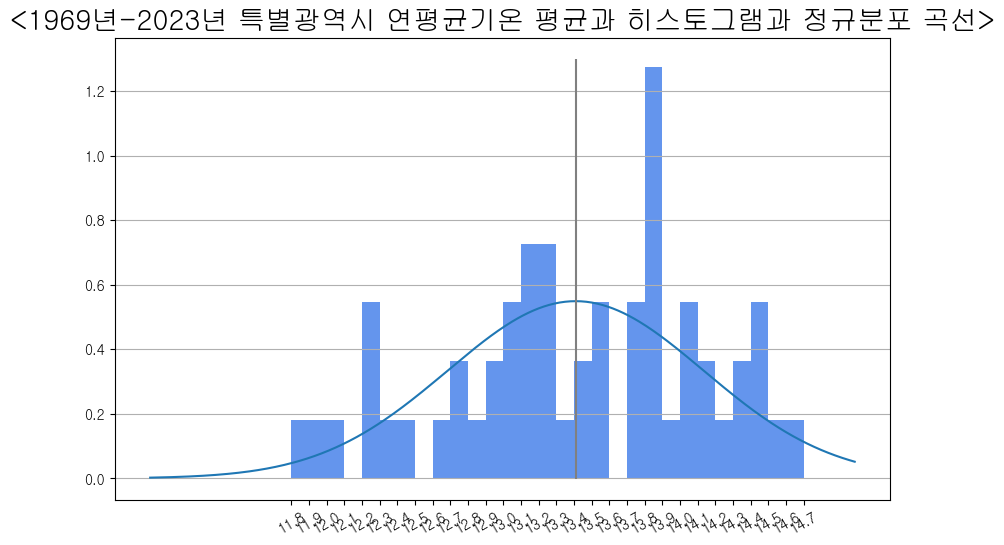

In [324]:
weights = np.ones_like(mean_tempSE.values) / len(mean_tempSE.values) * 10
plt.figure(figsize = (10, 6))
plt.hist(mean_tempSE.values, bins = buckets, color = 'cornflowerblue', weights = weights)
plt.xticks(np.linspace(np.trunc(mean_tempSE.min()*10)/10, np.ceil(mean_tempSE.max()*10)/10, len(buckets)), rotation = 30)
rv = stats.norm(mean_tempSE.mean(), mean_tempSE.std())
x = np.arange(math.floor(mean_tempSE.min()), math.floor(mean_tempSE.max()) + 1, 0.01)
y = rv.pdf(x)
plt.plot(x, y)
plt.vlines(mean_tempSE.mean(), -0.001, 1.3, color = 'gray')
plt.title('<1969년-2023년 특별광역시 연평균기온 평균과 히스토그램과 정규분포 곡선>', size = 20)
plt.grid(axis = 'y')
plt.show()

In [325]:
mean_tempSE.mean()

13.40961038961039

In [326]:
mean_tempSE.std()

0.7267695039750892

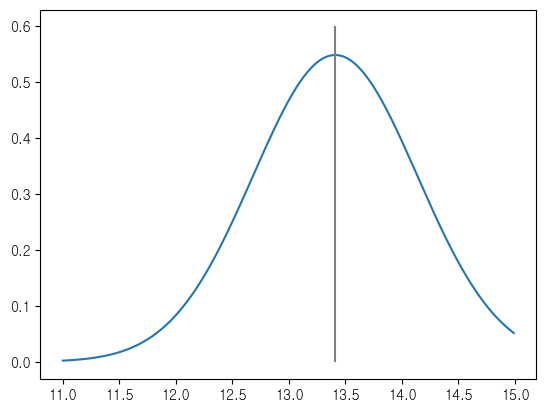

In [327]:
rv = stats.norm(mean_tempSE.mean(), mean_tempSE.std())
x = np.arange(math.floor(mean_tempSE.min()), math.floor(mean_tempSE.max()) + 1, 0.01)
y = rv.pdf(x)
plt.plot(x, y)
plt.vlines(mean_tempSE.mean(), -0.001, 0.6, color = 'gray')
plt.show()

In [328]:
# plt.figure(figsize = (10, 6))
# plt.hist(mean_tempSE.values, bins = 15, range = (np.trunc(mean_tempSE.min()*10)/10, np.ceil(mean_tempSE.max()*10)/10), color = 'cornflowerblue')
# plt.title('<부산·대구·광주·울산 연평균기온 히스토그램>', size = 20)
# plt.xticks(np.linspace(np.trunc(mean_tempSE.min()*10)/10, np.ceil(mean_tempSE.max()*10)/10, 15 + 1), rotation = 20)
# plt.grid(axis = 'y')
# plt.show()

- 강수량 히스토그램

In [329]:
pretempDF.xs('강수량(mm)', level = 1, axis = 1)

,서울,부산,인천,대구,대전,광주,울산
1969,1736.8,1800.4,1478.5,1231.2,1807.1,1723.3,1936.5
1970,1708.2,2138.1,1570.9,1319.4,1521.2,1313.8,1813.9
1971,1359.7,1087.3,1149.2,722.5,1420.2,1291.7,832.3
1972,1769.6,2195.5,1527.5,1206.6,1380.0,1824.6,1932.3
1973,928.1,1143.1,739.1,864.4,1102.9,1171.3,956.9
1974,1250.7,1698.0,1135.5,1214.6,1266.2,1730.1,1383.3
1975,1067.4,1536.1,878.8,1043.6,1383.0,1436.0,1306.5
1976,1109.5,1051.9,1060.8,733.5,939.3,1089.0,1027.0
1977,1147.5,1142.2,1073.1,769.7,1099.1,914.8,1024.9
1978,1160.9,1241.9,885.0,1012.7,1465.7,1571.1,1147.1


In [330]:
preciSE = pretempDF.xs('강수량(mm)', level = 1, axis = 1).mean(axis = 1) / 100
preciSE

1969    16.734000
1970    16.265000
1971    11.232714
1972    16.908714
1973     9.865429
1974    13.826286
1975    12.359143
1976    10.015714
1977    10.244714
1978    12.120571
1979    13.182857
1980    14.725857
1981    11.847571
1982     9.555143
1983    12.074857
1984    12.770857
1985    16.863143
1986    11.478286
1987    15.206571
1988     8.349714
1989    14.872571
1990    15.841857
1991    14.879429
1992    11.322714
1993    14.021000
1994     8.844857
1995    10.361286
1996    11.323286
1997    13.760143
1998    18.866857
1999    16.756429
2000    12.753714
2001    10.582571
2002    14.564857
2003    19.142286
2004    14.149143
2005    12.591143
2006    13.930143
2007    12.985714
2008    10.829286
2009    13.233286
2010    15.174286
2011    15.929571
2012    15.327143
2013    11.344000
2014    11.669857
2015     9.523143
2016    13.211571
2017     9.536714
2018    14.115429
2019    11.357000
2020    16.697714
2021    12.466286
2022    11.239714
2023    17.492714
dtype: flo

In [331]:
preciSE.mean()

13.205906493506493

In [332]:
preciSE.std()

2.6054791597160047

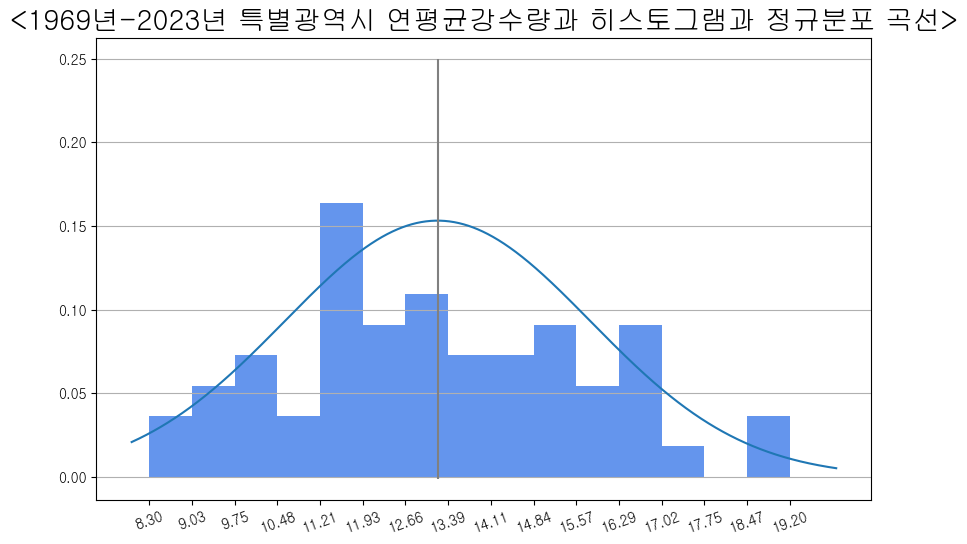

In [333]:
weights = np.ones_like(mean_tempSE.values) / len(mean_tempSE.values)
plt.figure(figsize = (10, 6))
plt.hist(preciSE.values, bins = 15, range = (np.trunc(preciSE.min()*10)/10, np.ceil(preciSE.max()*10)/10), color = 'cornflowerblue', weights = weights)
plt.xticks(np.linspace(np.trunc(preciSE.min()*10)/10, np.ceil(preciSE.max()*10)/10, 15 + 1), rotation = 20)
rv = stats.norm(preciSE.mean(), preciSE.std())
x = np.arange(math.floor(preciSE.min()), math.floor(preciSE.max()) + 1, 0.01)
y = rv.pdf(x)
plt.plot(x, y)
plt.vlines(preciSE.mean(), -0.001, 0.25, color = 'gray')
plt.title('<1969년-2023년 특별광역시 연평균강수량과 히스토그램과 정규분포 곡선>', size = 20)
plt.grid(axis = 'y')
plt.show()